$
In\;the\;name\;of\;God 
\\HW3\;NeuralNetwork
\\Abbas\;Mohamadiyan\;810898059
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

In [2]:
def randcir(X, Y, r): # X & Y represent the center & r is for radius
    while True:
        x = random.random()*2 -1
        y = random.random()*2 -1
        if x*x + y*y < 1:
            return (x*r+X, y*r+Y)
        

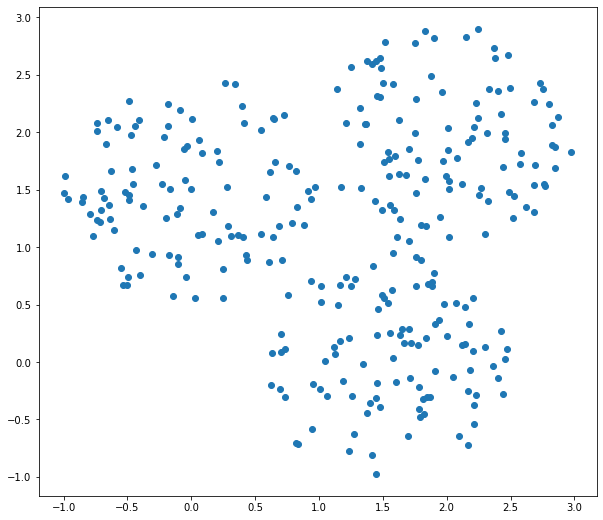

In [3]:
l = []
w = []
y0 = []
for i in range(100):
    x, y = randcir(2, 2, 1)
    l.append(x)
    w.append(y)
    y0.append(0)
    
for i in range(100):
    x, y = randcir(0, 1.5, 1)
    l.append(x)
    w.append(y)
    y0.append(1)
    
for i in range(100):
    x, y = randcir(1.5, 0, 1)
    l.append(x)
    w.append(y)
    y0.append(2)
    
plt.figure(figsize=(10,9))    
plt.scatter(l, w)

plt.show()

In [6]:
Dy = np.hstack((l, w, y0))
Dy = np.reshape(Dy, (300, 3), order='F') #the order 'F' was a tough one!
np.random.shuffle(Dy)
D = Dy[:,0:2]
ys = Dy[:,2]
n,d = D.shape
k = 3
Dic = {0:[1,0,0],
       1:[0,1,0],
       2:[0,0,1]}

#Y = np.array(list(map(lambda x:Dic[x],ys)))
Y = ys.reshape(n, 1)
X = D


In [8]:
trsize = int(0.7*n)
vasize = int(0.85*n)
Xt = X[0:trsize, :] ; Yt = Y[0:trsize]
Xv = X[trsize:vasize, :] ; Yv = Y[trsize:vasize]
Xte = X[vasize:n, :] ; Yte = Y[vasize:n]
print(Xt.shape)
print(Xv.shape)
print(Xte.shape)

(210, 2)
(45, 2)
(45, 2)


In [9]:
print(X[209,:] == Xt[209,:])
print(X[210,:] == Xv[0,:])
print(X[255,:] == Xte[0,:])

[ True  True]
[ True  True]
[ True  True]


In [10]:
def f1(x): return np.tanh(x)
def df1(x): return 1 - np.power(np.tanh(x),2)
def f2(x): return x
def df2(x): return 1

def aug(X):                                 #puts a 1 column in front of matrix
    n = len(X)
    X1 = np.ones((n,1))
    return np.hstack((X1,X))

def predict(X,W1,W2):                       #the name suggests =)
    Z = f1( aug(X) @ W1)
    O = f2( aug(Z) @ W2)
    return O

def update_pars(Y,X,W1,W2):
    Xt = aug(X)
    Z = f1(Xt @ W1)
    Zt = aug(Z)
    dZ = df1(Xt @ W1)
    O = f2(Zt @ W2)
    G2 = (O - Y)/len(Y)
    dW2 = Zt.T @ G2
    W2 -= eta * dW2
    G1 = (G2 @ W2[1:].T)*dZ
    dW1 = Xt.T @ G1
    W1 -= eta * dW1


In [11]:
n,d,m,p = trsize,2,3,1

W1 = np.random.randn(d+1,m)
W2 = np.random.randn(m+1,p)

eta = 1e-1  # step size (learning rate)
num_steps = int(1e5)

for i in tqdm(range(num_steps)):

    update_pars(Yt,Xt,W1,W2)


  0%|          | 0/100000 [00:00<?, ?it/s]

In [20]:
predict(Xv,W1, W2)

array([[ 0.02428015],
       [ 2.01897753],
       [ 2.09521535],
       [-0.08974237],
       [ 0.87240786],
       [ 2.09647359],
       [ 2.12587339],
       [ 1.92766727],
       [ 2.13990446],
       [ 2.08998851],
       [ 0.01536706],
       [ 1.07600626],
       [ 0.04603511],
       [ 0.94929108],
       [-0.00957102],
       [ 0.955295  ],
       [ 0.94299148],
       [ 1.44986785],
       [ 0.02529352],
       [ 0.01540293],
       [ 0.21786523],
       [ 0.04413096],
       [ 1.96133466],
       [ 2.02711564],
       [ 1.07758825],
       [ 0.99443592],
       [ 0.96947293],
       [ 2.0756713 ],
       [ 0.9089987 ],
       [ 0.9418727 ],
       [ 1.96094768],
       [ 1.17920869],
       [ 1.00552663],
       [ 1.02712524],
       [ 2.01213022],
       [ 0.98832852],
       [ 0.97913357],
       [ 0.89237376],
       [ 0.8464863 ],
       [ 0.99915158],
       [ 0.66198155],
       [ 0.8995458 ],
       [ 2.1151422 ],
       [-0.02676724],
       [-0.07301875]])

In [22]:
Yv

array([[0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.]])